# Module 1 Project
# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)

# Introduction:

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

# We are aiming to answer the following questions:

A. 25% undervalued properties. Where are they? What does the tax/logerror shows?  
B. For how long was a property on the market? Did it effect the price?  
C. Tax fluctuation over the years. Did it effect the logerror?  
D. Time of year/month the property most likely to be sold undervaluetad (will sell for more)


# Our research:

Step 1: To understand the data provided by looking at summary statistics alongside given data definitions, to make sense of what each data series (column) is representing, whether it's continous, binary or categorical, what values it takes, whether its affected by duplicates and nulls.

Step 2: Based on the finding from previous step, we will clean the data, replacing, converting or deleting Nulls, duplicates as appropriate.

Step 3: Based on the given data, and with the ultimate aim of predicting house price in mind. We ask a few questions that may review interesting trends or useful insights. We plan to use visulisation to help answer the questions.

Step 4: We use visulisation to further study the distribution of potential key independent variables as indicated by correlation matrix. We will also check for a linear relationship between independent variables and the dependent variable via scatter plots. We will also be looking for any obvious data outliers in the graphs.

Step 5: Predictive modelling fitting and evaluation. Including checking of the model assumptions.

Step 6: Interpret the model, give examples of how the x variables relate to y variable, and how we can use it to predict y.

Step 7: Further insight into data knowing limitations of model.


# Step 1. Understanding our Data

We will import all the necessary libraries and the given csv files, also understand the data provided by looking at summary statistics alongside given data definitions, to make sense of what each data series (column) is representing, whether it's continous, binary or categorical, what values it takes, whether its affected by duplicates and nulls.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

from datetime import datetime
from scipy import stats
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# display options
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')
sns.set_context('poster')

In [2]:
# import properties_2016 df
df_properties = pd.read_csv('properties_2016.csv')
df_properties.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [3]:
# import train_2016 df
df_train = pd.read_csv('train_2016_v2.csv')
df_train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
# summary statistics of the columns
df_properties.describe().round()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2985217.0,811519.0,6061.0,1628.0,2973755.0,2973767.0,12629.0,1938488.0,2856305.0,17096.0,202717.0,2929652.0,2709184.0,7672.0,190798.0,202717.0,22001.0,2973780.0,312637.0,2856305.0,883267.0,883267.0,1806401.0,2973780.0,2973780.0,2709118.0,517534.0,27960.0,36939.0,32075.0,485459.0,2973780.0,2973780.0,2922372.0,2973780.0,1156402.0,2971237.0,2973742.0,1624.0,311631.0,6747.0,1977490.0,80355.0,2647.0,2925289.0,682069.0,2930235.0,2942667.0,2973778.0,2917484.0,2953967.0,56464.0,2.910091e+06
mean,13325858.0,2.0,7.0,647.0,2.0,3.0,4.0,6.0,2.0,66.0,1381.0,1827.0,1760.0,1179.0,2739.0,1389.0,2414.0,6048.0,1.0,2.0,2.0,384.0,4.0,34001469.0,-118201934.0,22823.0,1.0,520.0,1.0,1.0,1.0,260.0,60483450.0,34993.0,2570.0,193476.0,96553.0,1.0,7.0,1.0,6.0,1.0,320.0,278.0,1964.0,1.0,170884.0,420479.0,2015.0,252478.0,5378.0,14.0,6.048431e+13
std,7909966.0,3.0,2.0,539.0,1.0,1.0,1.0,2.0,1.0,0.0,633.0,1820.0,971.0,357.0,5447.0,664.0,7695.0,20.0,0.0,1.0,1.0,245.0,3.0,243381.0,345317.0,337592.0,0.0,191.0,0.0,0.0,0.0,16.0,200812.0,50727.0,788.0,165713.0,3673.0,3.0,0.0,0.0,0.0,2.0,233.0,370.0,23.0,1.0,402068.0,726347.0,0.0,445013.0,9183.0,3.0,3.249035e+11
min,10711725.0,1.0,2.0,20.0,0.0,0.0,1.0,1.0,1.0,66.0,3.0,1.0,1.0,120.0,112.0,3.0,117.0,6037.0,1.0,1.0,0.0,0.0,1.0,33324388.0,-119475780.0,100.0,1.0,19.0,1.0,1.0,1.0,31.0,60371011.0,3491.0,1286.0,6952.0,95982.0,0.0,7.0,1.0,4.0,1.0,10.0,10.0,1801.0,1.0,1.0,1.0,2000.0,1.0,1.0,0.0,-1.000000e+00
25%,11643707.0,1.0,7.0,272.0,2.0,2.0,3.0,4.0,2.0,66.0,1012.0,1213.0,1196.0,960.0,1694.0,1013.0,1079.0,6037.0,1.0,2.0,2.0,324.0,2.0,33827685.0,-118392983.0,5688.0,1.0,430.0,1.0,1.0,1.0,261.0,60373203.0,12447.0,2061.0,46736.0,96180.0,0.0,7.0,1.0,6.0,1.0,190.0,96.0,1950.0,1.0,74800.0,179675.0,2015.0,74836.0,2461.0,14.0,6.037400e+13
50%,12545094.0,1.0,7.0,534.0,2.0,3.0,4.0,7.0,2.0,66.0,1283.0,1572.0,1539.0,1296.0,2172.0,1284.0,1992.0,6037.0,1.0,2.0,2.0,441.0,2.0,34008249.0,-118172540.0,7000.0,1.0,495.0,1.0,1.0,1.0,261.0,60375712.0,25218.0,3101.0,118920.0,96377.0,0.0,7.0,1.0,6.0,1.0,270.0,168.0,1963.0,1.0,122590.0,306086.0,2015.0,167042.0,3992.0,14.0,6.037572e+13
75%,14097122.0,1.0,7.0,847.0,3.0,4.0,4.0,7.0,3.0,66.0,1615.0,2136.0,2070.0,1440.0,2976.0,1618.0,3366.0,6059.0,1.0,3.0,2.0,494.0,7.0,34161860.0,-117949468.0,9898.0,1.0,594.0,1.0,1.0,1.0,261.0,60590423.0,45457.0,3101.0,274800.0,96974.0,0.0,7.0,1.0,6.0,1.0,390.0,320.0,1981.0,2.0,196889.0,488000.0,2015.0,306918.0,6201.0,15.0,6.059042e+13
max,169601949.0,13.0,27.0,8516.0,20.0,20.0,5.0,12.0,20.0,66.0,31303.0,952576.0,290345.0,2688.0,820242.0,31303.0,952576.0,6111.0,9.0,20.0,25.0,7749.0,24.0,34819650.0,-117554316.0,328263808.0,1.0,17410.0,1.0,1.0,1.0,275.0,61110091.0,396556.0,3101.0,764167.0,399675.0,96.0,7.0,7.0,13.0,997.0,7983.0,6141.0,2015.0,41.0,251486000.0,282786000.0,2016.0,90246219.0,3458861.0,99.0,4.830301e+14


In [5]:
# summary statistics of the columns
df_train.describe()

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


In [6]:
# check shape 
print(df_properties.shape)
print(df_train.shape)

(2985217, 58)
(90275, 3)


In [7]:
# merge df_properties and df_train in order to make a working DataFrame with all the features, logerror and transactiondate
df = pd.merge(df_train, df_properties, on='parcelid', how = 'inner')
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [8]:
# # rearrange df
# df.transpose()

In [9]:
# get overview of the full dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

In [10]:
# summary statistics of the columns of the merged df
df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,1.187884,2.241231,1.812005,345.521228,3.926979,3.400541e+07,-1.181989e+08,2.911016e+04,1.0,519.827657,1.0,1.0,1.0,261.832179,6.049179e+07,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7.0,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,20.663461,0.484173,0.963142,0.608761,267.015918,3.684382,2.649654e+05,3.606032e+05,1.217213e+05,0.0,155.054210,0.0,0.0,0.0,5.182901,2.050549e+05,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0.0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037620e+0

In [11]:
# check Datatypes
df_dtype = df.dtypes.reset_index()
df_dtype.columns = ['Count', 'Column Type']
df_dtype

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,airconditioningtypeid,float64
4,architecturalstyletypeid,float64
5,basementsqft,float64
6,bathroomcnt,float64
7,bedroomcnt,float64
8,buildingclasstypeid,float64
9,buildingqualitytypeid,float64


In [12]:
# summary of the Datatypes
df_dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,object,6


In [13]:
# check the latitude and longitude 
print(df.latitude.head())
print(df.longitude.head())

0    34280990.0
1    33668120.0
2    34136312.0
3    33755800.0
4    33485643.0
Name: latitude, dtype: float64
0   -118488536.0
1   -117677556.0
2   -118175032.0
3   -118309000.0
4   -117700234.0
Name: longitude, dtype: float64


## Findings

As we can see, we have loads of NaN values in our dataset. Some of the have more than 90% NaN values.

By checking the Datatypes, we can see that the 'transactiondate' column has an 'object' type, which we will need to convert to Datetime.

The Longitude and Latidute values has been altered according to zillow_data_dictionary.xlsx:  "Latitude of the middle of the parcel multiplied by 10e6", so we will have to normalize them.

# Step 2: Data Cleaning

Based on the findings from previous step, we will clean the data, replacing, converting or deleting Nulls, duplicates as appropriate.

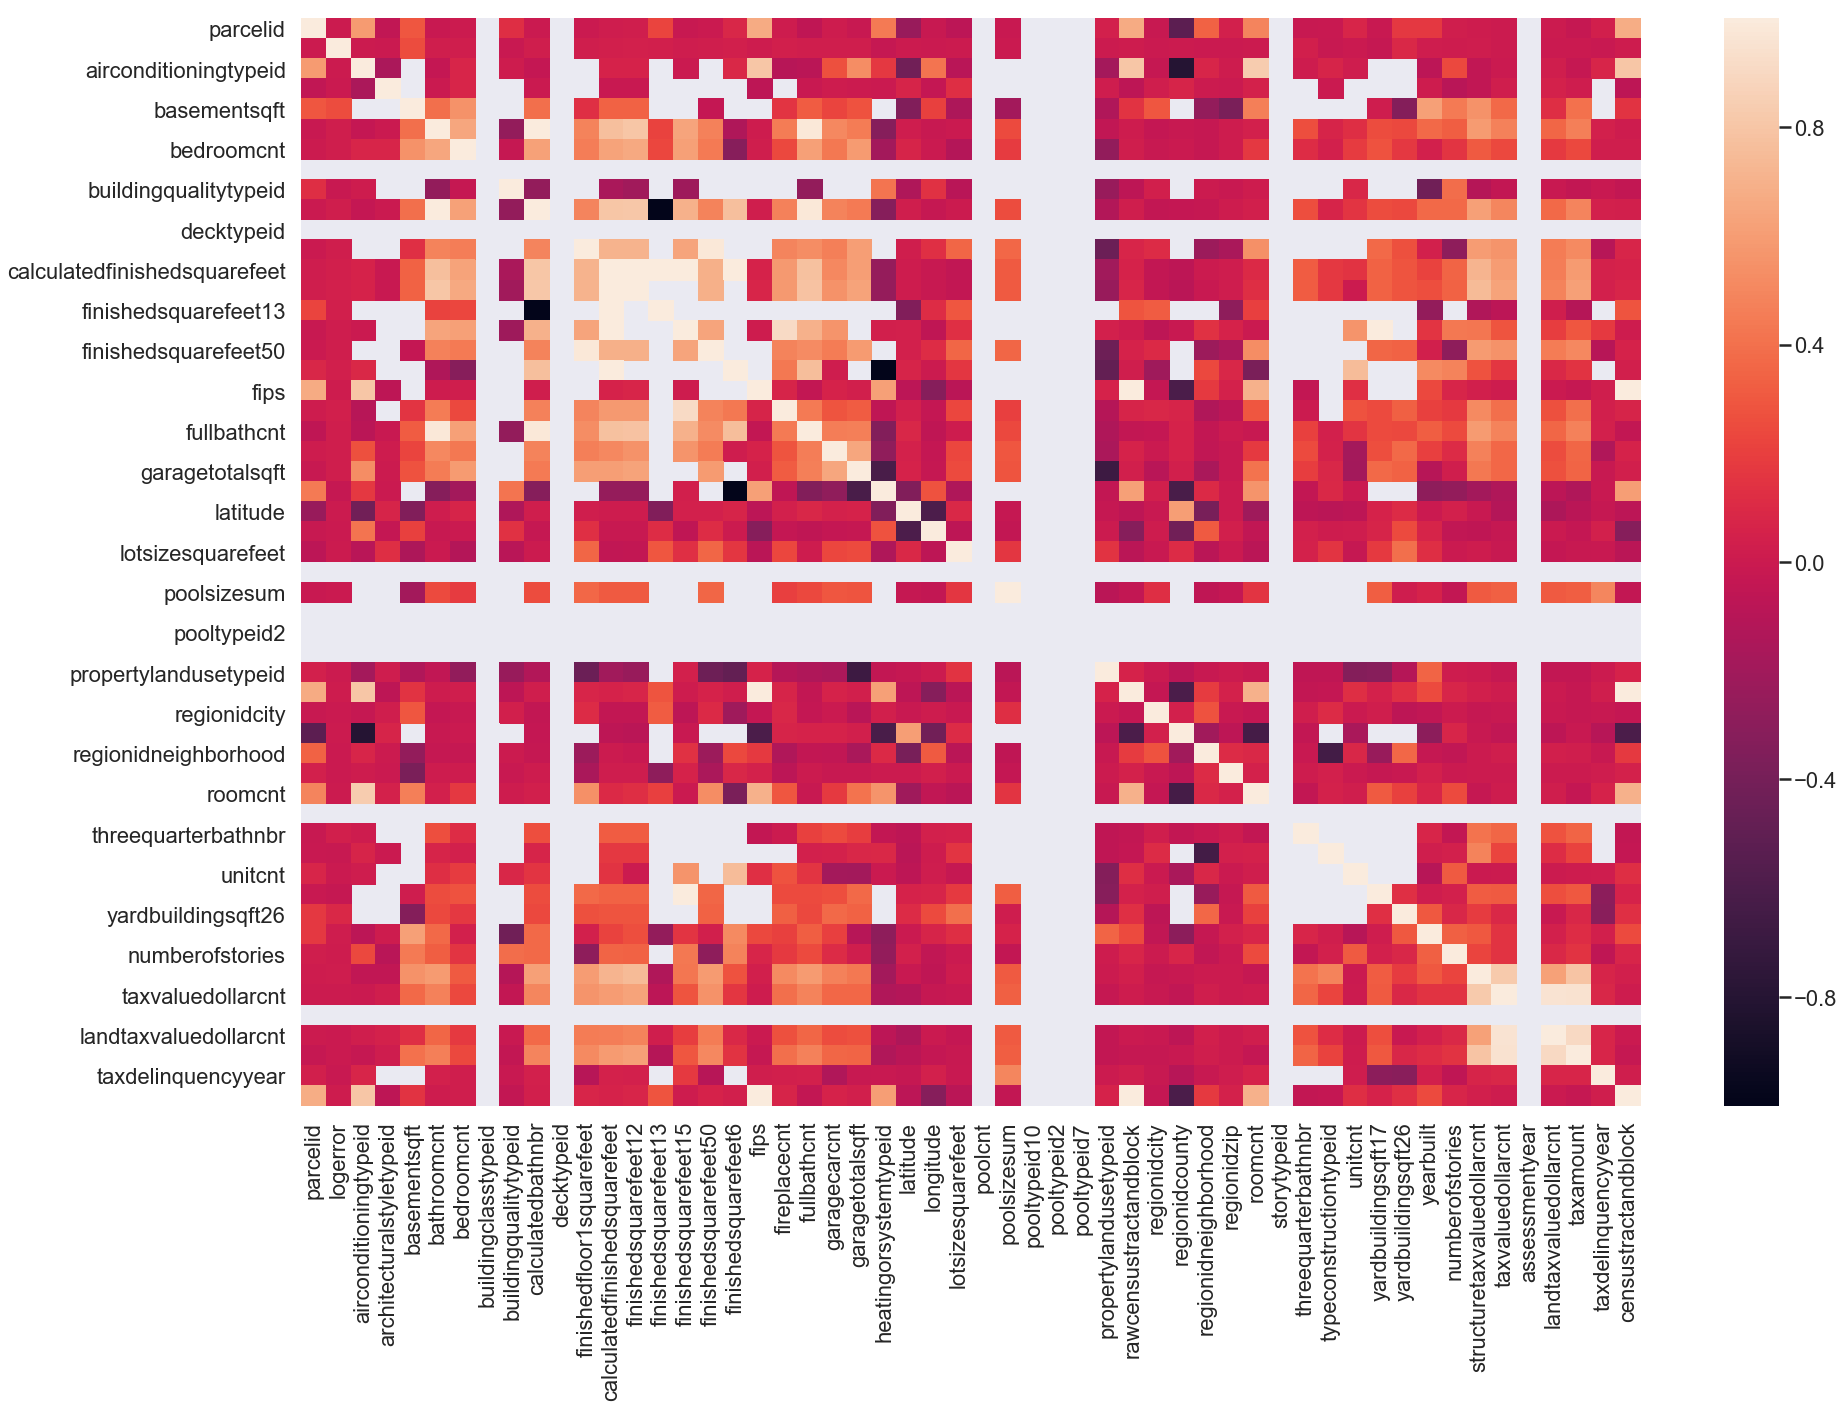

In [14]:
# correlation heatmap of the uncleaned data (all NaN values present) to have an overall view
# let's see how messy is the data
plt.figure(figsize=(30, 20))
sns.heatmap(data = df.corr())
plt.show()

In [15]:
# create df for missing values
# find percentage of NaN values
df_missing = (df.isna().mean().round(4) * 100).reset_index()
df_missing.columns = ['column','percentage']
df_missing = df_missing.sort_values(by = 'percentage')
df_missing

,column,percentage
0,parcelid,0.00
27,longitude,0.00
34,propertycountylandusecode,0.00
35,propertylandusetypeid,0.00
37,rawcensustractandblock,0.00
39,regionidcounty,0.00
42,roomcnt,0.00
26,latitude,0.00
19,fips,0.00
7,bedroomcnt,0.00


In [16]:
# prepare to plot df with missing values
df_missing = df.isna().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.loc[df_missing['missing_count']>0]
df_missing = df_missing.sort_values(by='missing_count')

Text(0.5, 1.0, 'Number of NaN values in each column')

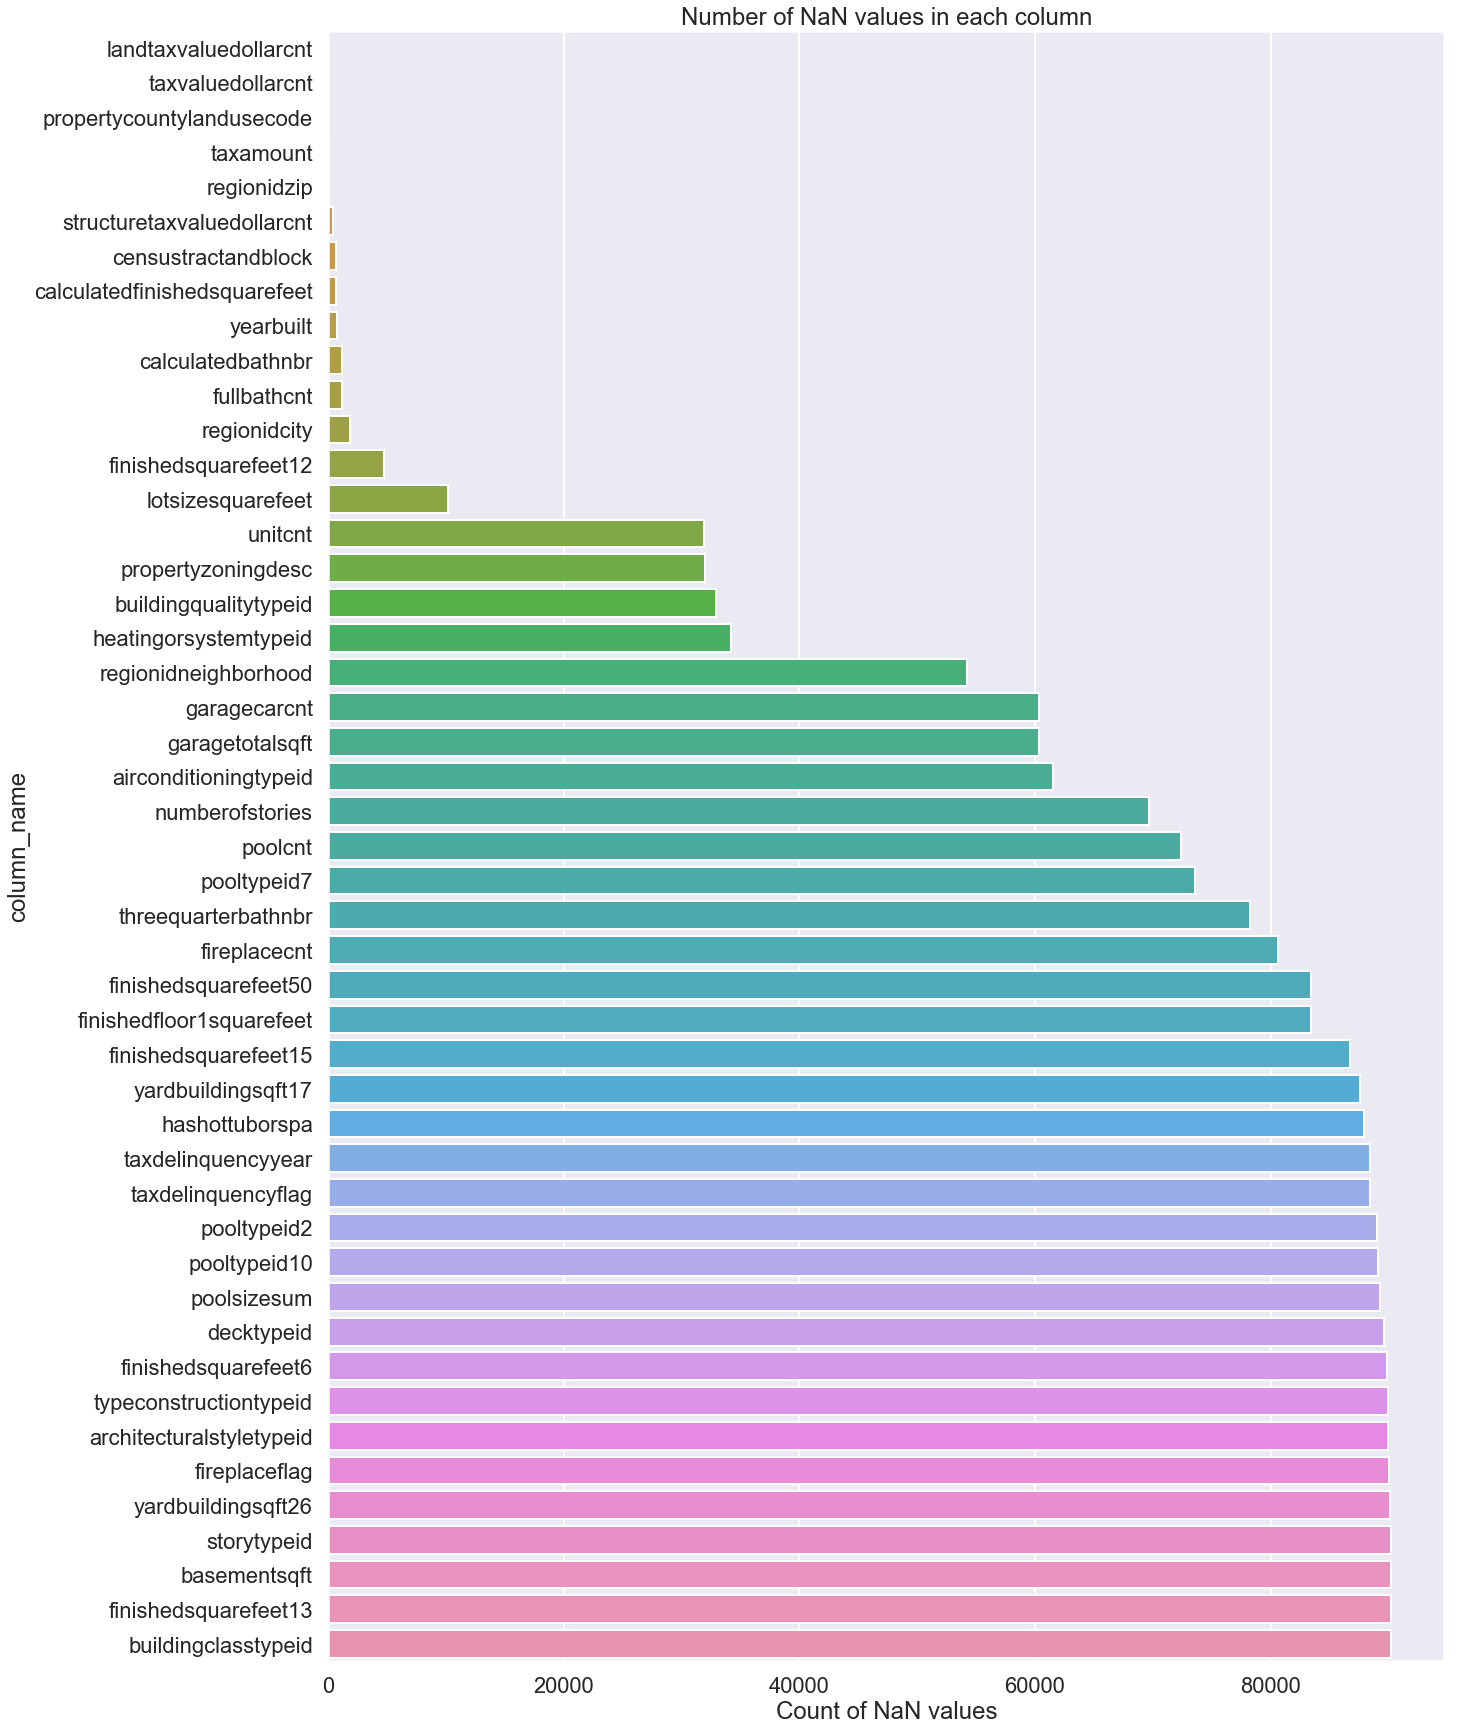

In [17]:
# visualize df with missing values
fig, ax = plt.subplots(figsize=(20, 30))
sns.barplot(x='missing_count', y='column_name', data = df_missing)
ax.set_xlabel('Count of NaN values')
ax.set_title('Number of NaN values in each column')

Text(0.5, 1.0, 'Number of NaN values in each column')

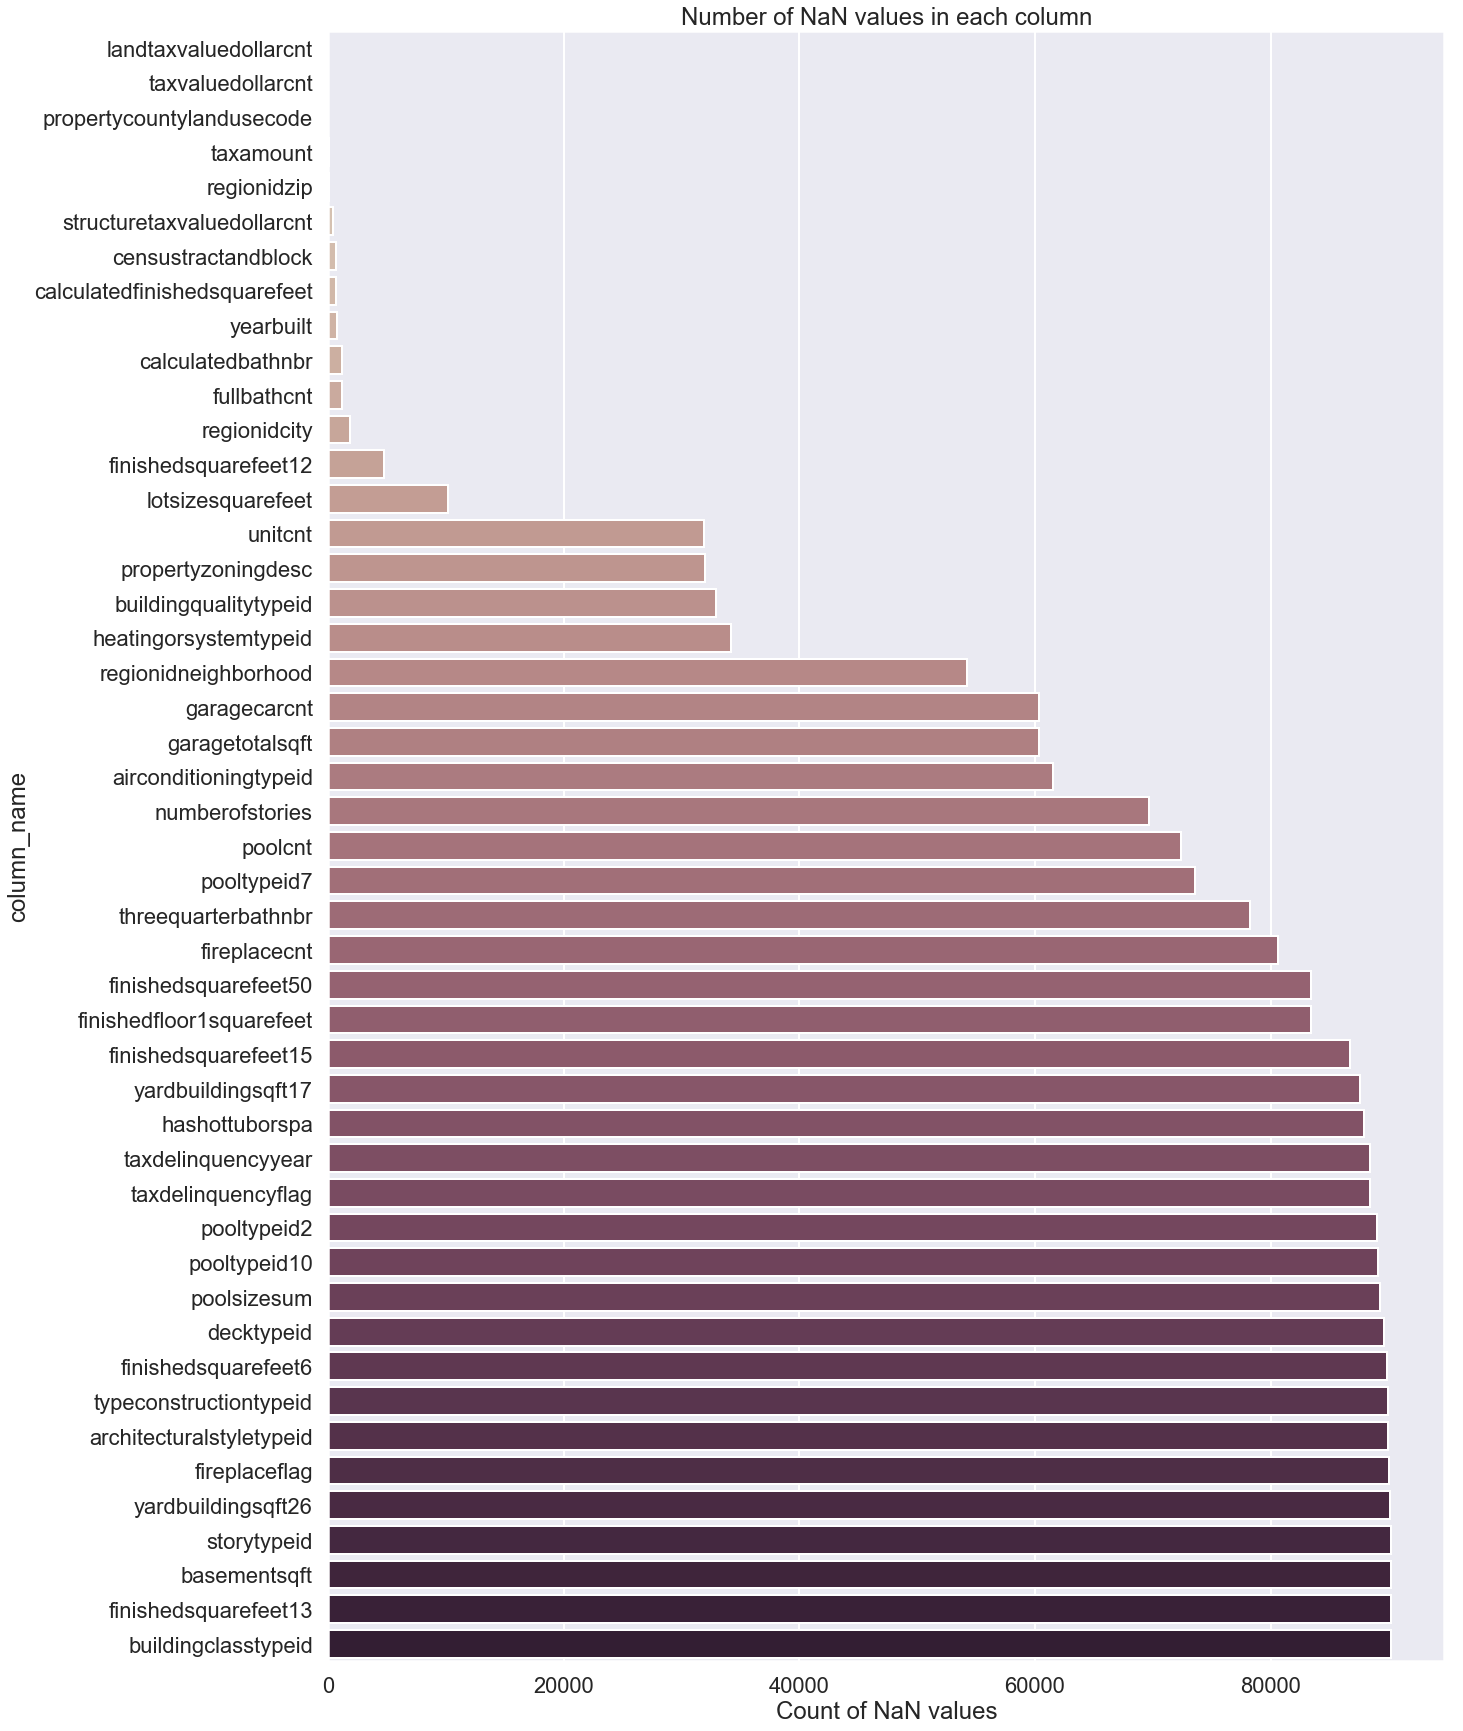

In [18]:
# plot with different color palette for a more "business look"
fig, ax = plt.subplots(figsize=(20, 30))
sns.barplot(x='missing_count', y='column_name', palette='ch:.25', data = df_missing)
ax.set_xlabel('Count of NaN values')
ax.set_title('Number of NaN values in each column')

In [19]:
# create a df cleaned from columns containing more than 50% NaN values
df_missing = (df.isna().sum()/len(df)).reset_index()
df_missing.columns = ['column','proportion']
df_missing = df_missing.sort_values(by = 'proportion')

missingvaluescols = df_missing[df_missing['proportion'] > 0.50].column.tolist()
df_clean = df.drop(missingvaluescols, axis=1)
df_clean.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016-01-01,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,2.0,34280990.0,-118488536.0,7528.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,2016-01-01,3.5,4.0,NaN,3.5,2263.0,2263.0,6059.0,3.0,NaN,33668120.0,-117677556.0,3643.0,1,261.0,NaN,6.059052e+07,32380.0,1286.0,96962.0,0.0,NaN,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,2016-01-01,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,2.0,34136312.0,-118175032.0,11423.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016-01-02,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,2.0,33755800.0,-118309000.0,70859.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016-01-02,2.5,4.0,NaN,2.5,2283.0,2283.0,6059.0,2.0,NaN,33485643.0,-117700234.0,6000.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,96961.0,8.0,NaN,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [20]:
# check the difference between the merged df and the cleaned df 
print(df.shape)
print(df_clean.shape)

(90275, 60)
(90275, 31)


In [21]:
# check the new clean df
df_clean.dtypes

parcelid                          int64
logerror                        float64
transactiondate                  object
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64


In [22]:
# create a df containing only float type columns
df_float = df_clean.drop(['parcelid','transactiondate', 'propertycountylandusecode', 'propertyzoningdesc', 'assessmentyear'], axis=1)
df_float.dtypes

logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
landtaxvaluedollarcnt           float64
taxamount                       float64


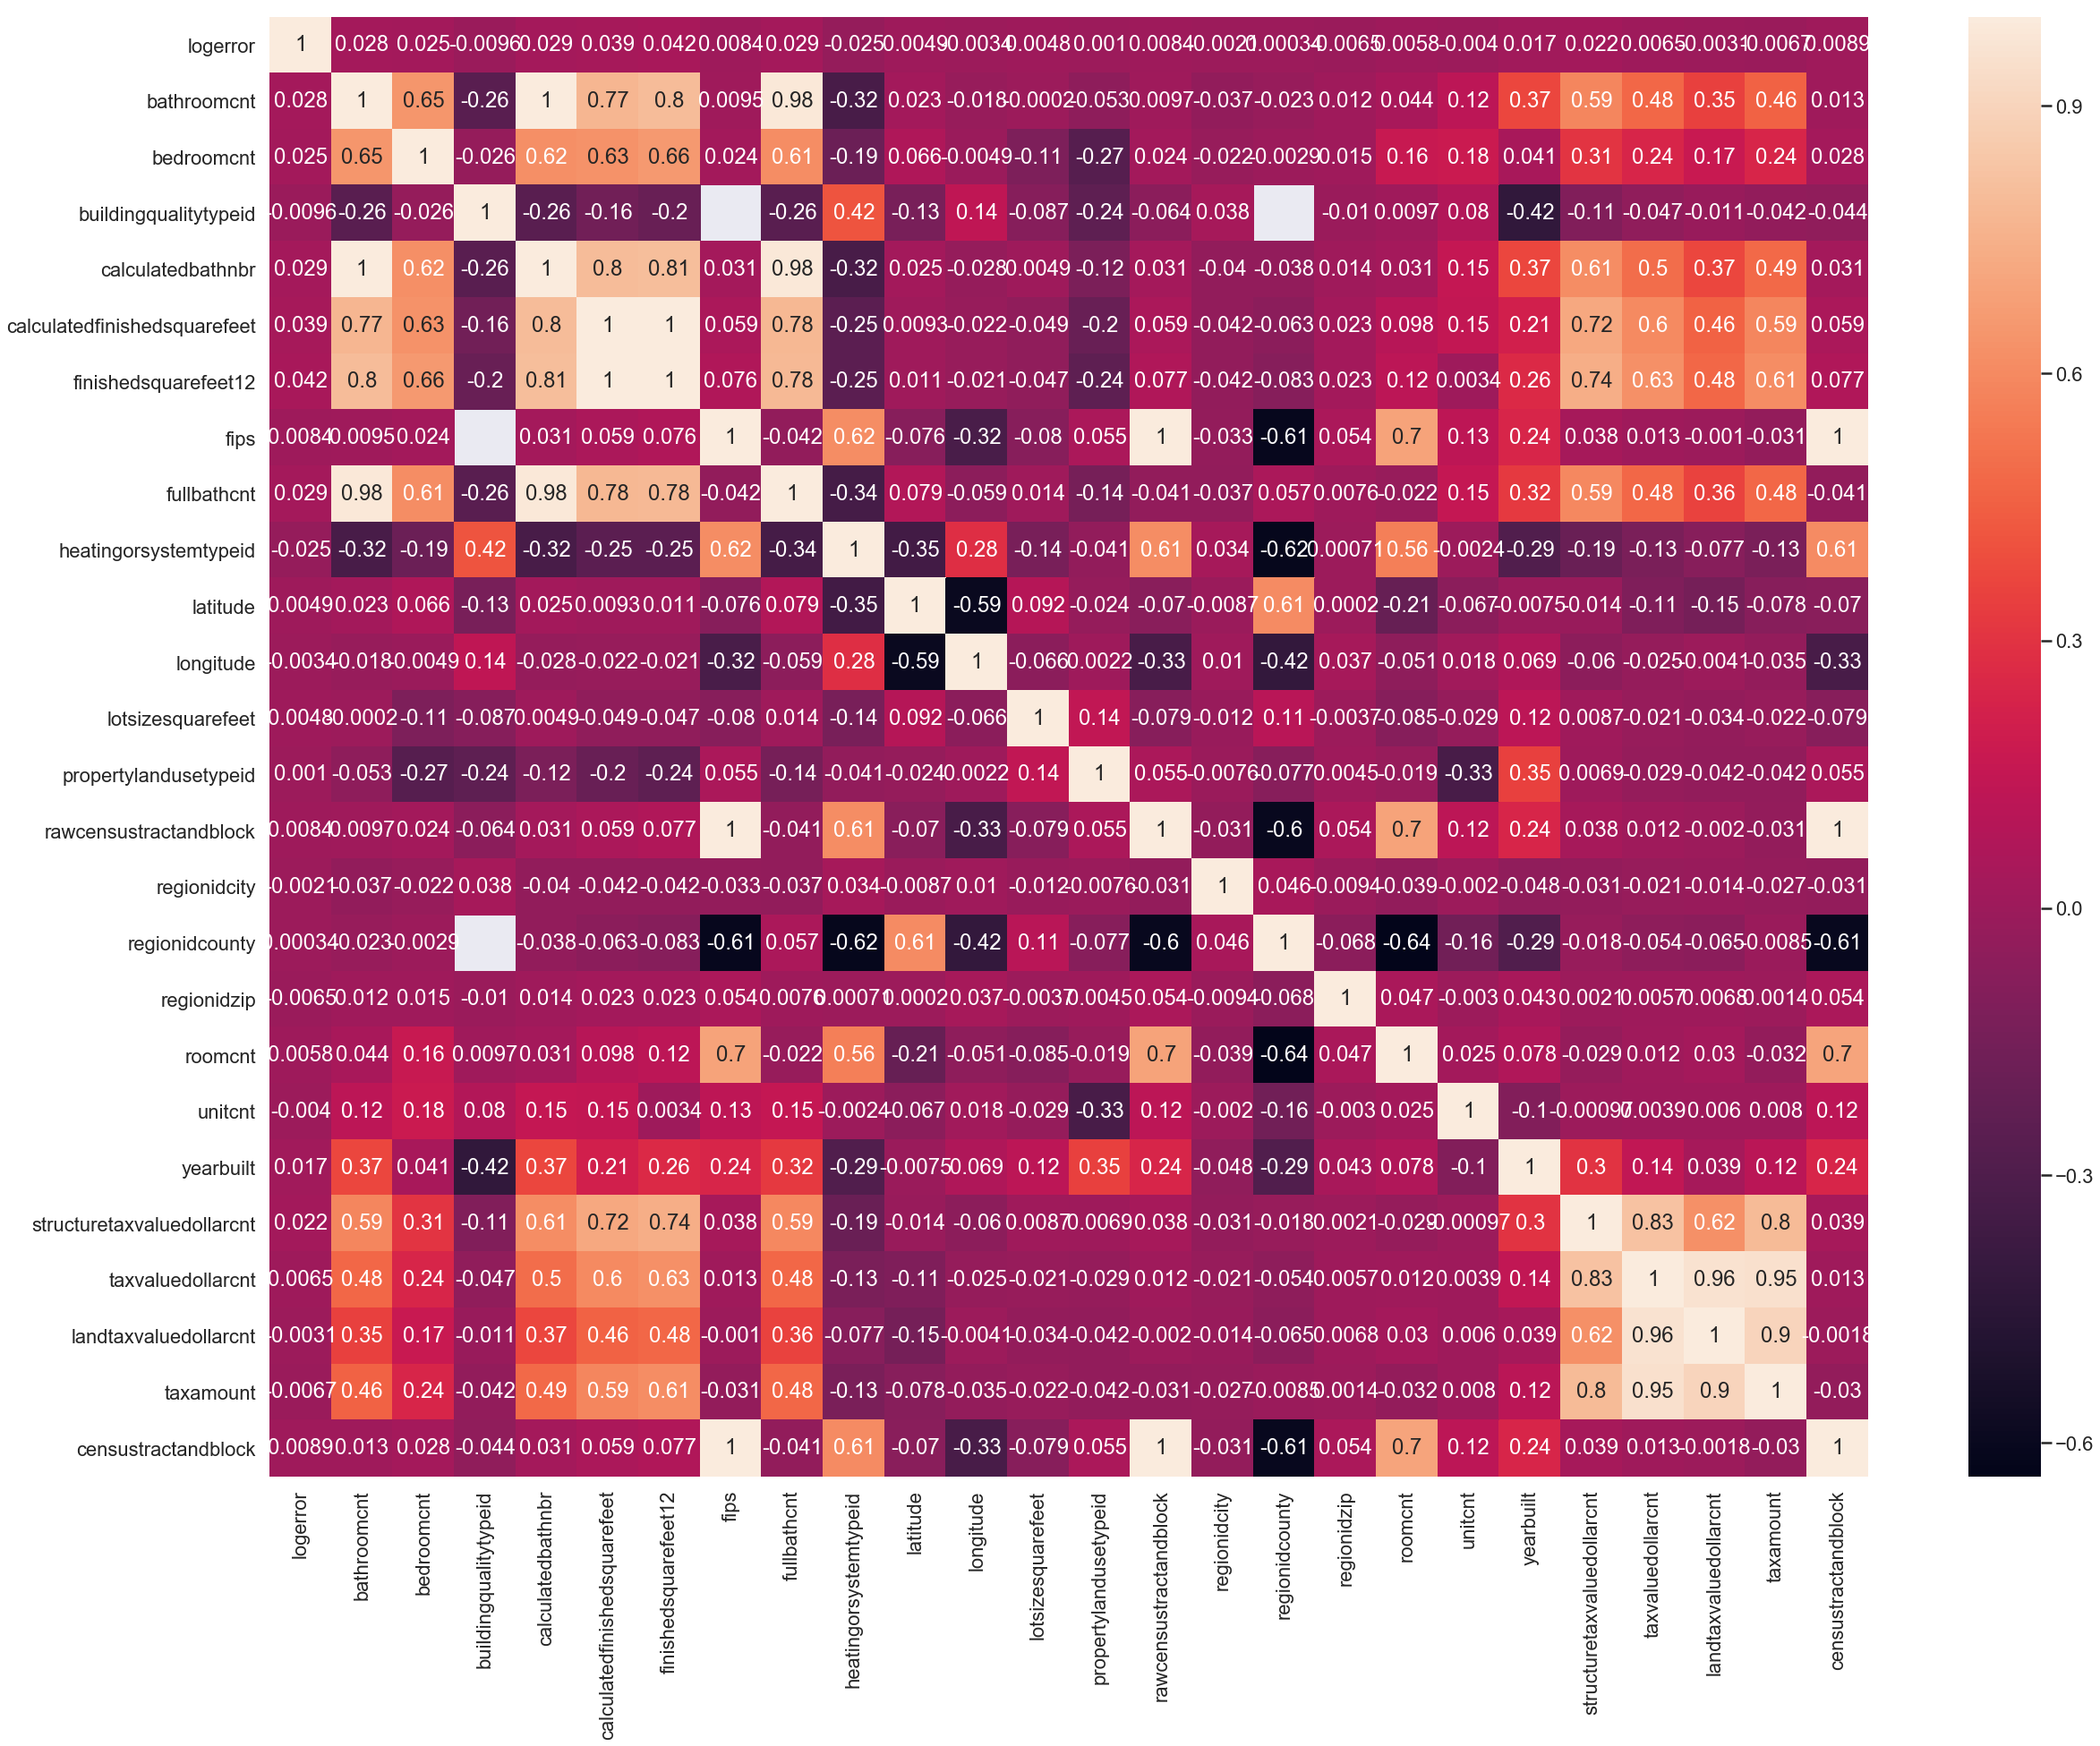

In [23]:
# correlation heatmap of the float variables
sns.set_context('poster')
plt.figure(figsize=(40, 30))
sns.heatmap(data = df_float.corr(), annot=True)
plt.show()

In [24]:
# check for duplicates
duplicates = df_clean[df_clean.duplicated()]
print(len(duplicates))
duplicates.head()

0


,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock


In [25]:
# create df for mapping
df_geo = df_clean[['latitude', 'longitude', 'logerror']]
df_geo.head()

,latitude,longitude,logerror
0,34280990.0,-118488536.0,0.0276
1,33668120.0,-117677556.0,-0.1684
2,34136312.0,-118175032.0,-0.0040
3,33755800.0,-118309000.0,0.0218
4,33485643.0,-117700234.0,-0.0050


In [26]:
df_geo.dropna(subset=['latitude', 'longitude'], axis=0, inplace=True)
df_geo.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,latitude,longitude,logerror
0,34280990.0,-118488536.0,0.0276
1,33668120.0,-117677556.0,-0.1684
2,34136312.0,-118175032.0,-0.0040
3,33755800.0,-118309000.0,0.0218
4,33485643.0,-117700234.0,-0.0050


In [27]:
# the zillow data dictionary says the have "Latitude of the middle of the parcel 
# multiplied by 10e6", so we have to normalize it to be readable by Folium
df_geo['longitude']/=1e6
df_geo['latitude']/=1e6

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
# replace the lat and lonf in the merged df
# check longitude
df_clean['latitude'] = df_geo.latitude
df_clean['longitude'] = df_geo.longitude
df_clean.longitude

0       -118.488536
1       -117.677556
2       -118.175032
3       -118.309000
4       -117.700234
5       -118.402768
6       -118.212720
7       -119.165589
8       -117.678000
9       -117.742000
10      -118.477995
11      -118.547322
12      -118.339183
13      -117.844000
14      -117.914140
15      -117.950591
16      -118.757591
17      -118.123000
18      -118.021281
19      -118.528595
20      -118.188672
21      -117.838936
22      -118.025454
23      -118.396647
24      -117.921597
25      -118.009610
26      -118.154873
27      -117.722058
28      -118.522000
29      -118.141000
            ...    
90245   -118.611010
90246   -118.188000
90247   -118.329294
90248   -117.763393
90249   -118.449813
90250   -117.994884
90251   -118.095015
90252   -118.095993
90253   -118.102000
90254   -118.099813
90255   -118.211297
90256   -117.763462
90257   -118.643000
90258   -118.322000
90259   -118.328000
90260   -118.360000
90261   -118.303458
90262   -118.455969
90263   -118.252000


In [29]:
# check if we have a valid lat and long (choose the first row)
new_map = df_clean
len(df_clean)
new_map = folium.Map(location=[34.280990, -118.488536],
                        zoom_start=13,
                        tiles='Stamen Terrain')
marker = folium.Marker([34.065737, -118.00859]).add_to(new_map)
new_map

# Findings: 

We decided to create a new df_clean in order to drop the columns containing more than 50% of NaN values. Many of these columns had relatively minor relevance, in other columns the Null values couldn't be replaced with mean/median values.
We have normalized the longitude and latitude, plotted the first row to check if the given geographical data is valid.

# Step 3: Questions based on our data
Based on the given data, and with the ultimate aim of predicting house price in mind. We ask a few questions that may review interesting trends or useful insights. We plan to use visulisation to help answer the questions.

Question 1: Has houses got bigger over the years in California?

Question 2: Is there seasonality in the transactions?

Question 3: Where are the underestimated/overestimated houses located?  

Question 4: Where are the historic houses located?

# Question 1: Has houses got bigger over the years in California?
This question is likely best answered by plotting graphs, on the x-axis we will plot yearbuilt, on the y-axis we have several data series representing the size of the properties, we feel finishedsquarefeet12, bedroomcnt are the most representitive of the house size.

We first group data by yearbuilt and plot the median finishedsquarefeet12 per each yearbuilt, this reduces/summerises the data which would enable an easier study on any trends present. We choose median rather than mean for sqft_living, as this is a continous data set with bounded min but somewhat unbounded max, and extreme large values could be present in the data which could skew the mean but not median. For bedrooms we chose to aggregate by mean as being a discrete dataset, the median is likely the same for many yr_built hence we would not be able to spot any trends.

We will also look at number of bathroomcnt as a supplement to the size trend.  
By the given dictionary:  
yearbuilt - "The Year the principal residence was built"  
finishedsquarefeet12 - "Finished living area"  
bedroomcnt - "Number of bedrooms in home"  
bathroomcnt - "Number of bathrooms in home including fractional bathrooms"

In [30]:
# groupby yearbuilt
houses_by_year = df_clean.groupby('yearbuilt')
houses_in_year = houses_by_year.size()

In [31]:
# median and mean values
avg_live_size_by_year = df_clean.groupby('yearbuilt')['finishedsquarefeet12'].median()
avg_room_size_by_year = df_clean.groupby('yearbuilt')['bedroomcnt'].mean()
avg_bath_size_by_year = df_clean.groupby('yearbuilt')['taxamount'].median()

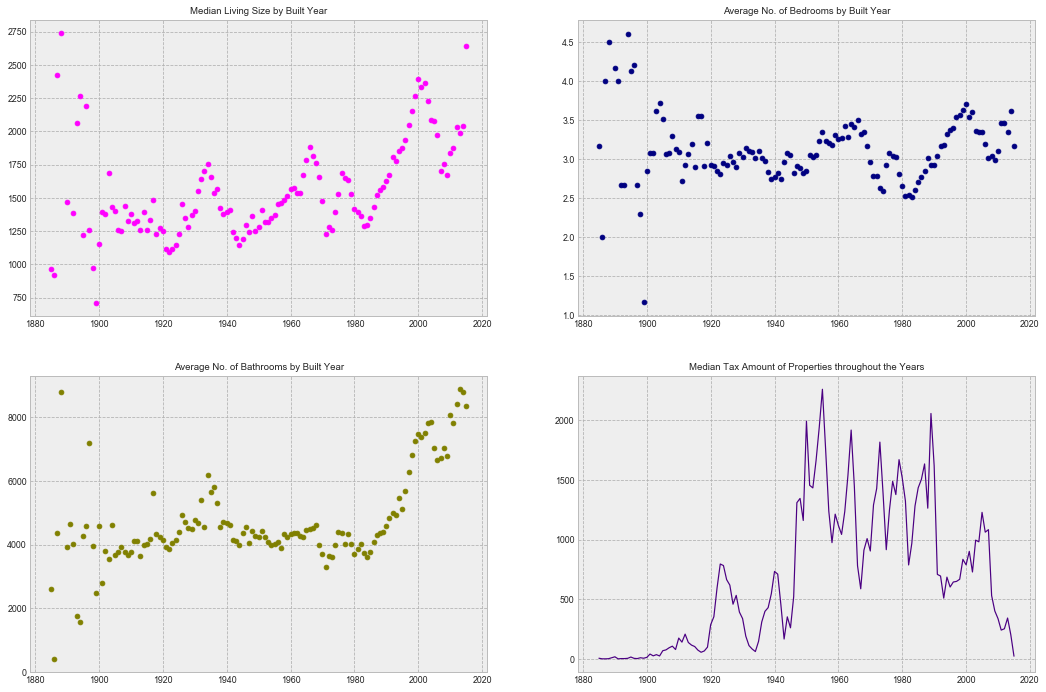

In [32]:
# visualize the findings
plt.style.use('bmh')
fig = plt.figure(figsize = (18,12))
sns.set_context('paper')

ax1 = fig.add_subplot(221)
plt.scatter(avg_live_size_by_year.index, avg_live_size_by_year.values, color='magenta')
plt.title('Median Living Size by Built Year')

ax2 = fig.add_subplot(222)
plt.scatter(avg_room_size_by_year.index, avg_room_size_by_year.values, color='navy')
plt.title('Average No. of Bedrooms by Built Year')

ax3 = fig.add_subplot(223)
plt.scatter(avg_bath_size_by_year.index, avg_bath_size_by_year.values, color='olive')
plt.title('Average No. of Bathrooms by Built Year')

ax4 = fig.add_subplot(224)
plt.plot(houses_in_year.index, houses_in_year.values, color='indigo')
plt.title('Median Tax Amount of Properties throughout the Years')

plt.show()

# Findings:  
  
The Median Living Size shows a big inconsistency through the years. It has big outliers on both ends, but more on the side of the historic buildings. After 1920 it looks like the sqft of the living space was growing until the World War II when it greatly declined. It was slowly growing again, having peak around the 70's, when it declined again. Then another growth until the recent (2005-2009) property bubble.

The Average Number of Bedrooms show more consistency, the outliers of the early houses might be inaccurate data, but the number of rooms are usually between 2.5 and 3.5 rooms.

The Average Number of Bathrooms were consistent until the 80's, after that they show a steep rise which is similar to the findings the previous King's County House Data.

The Median Tax Amount of Properties throughout the Years is all sudden drops and rises, which might show the populations economical difficulties (low values), or positive environment for house transactions (for example goverment regulations helping buy a property --> low taxes --> more house buys --> more total property tax assessed for that assessment year)

# Question 2: Is there seasonality in the transactions?

What difference can we see in transactiondates? Which month people more likely to buy a property and which not?

In [33]:
# convert transactiondate to datetime
df_clean.transactiondate = pd.to_datetime(df_clean.transactiondate)

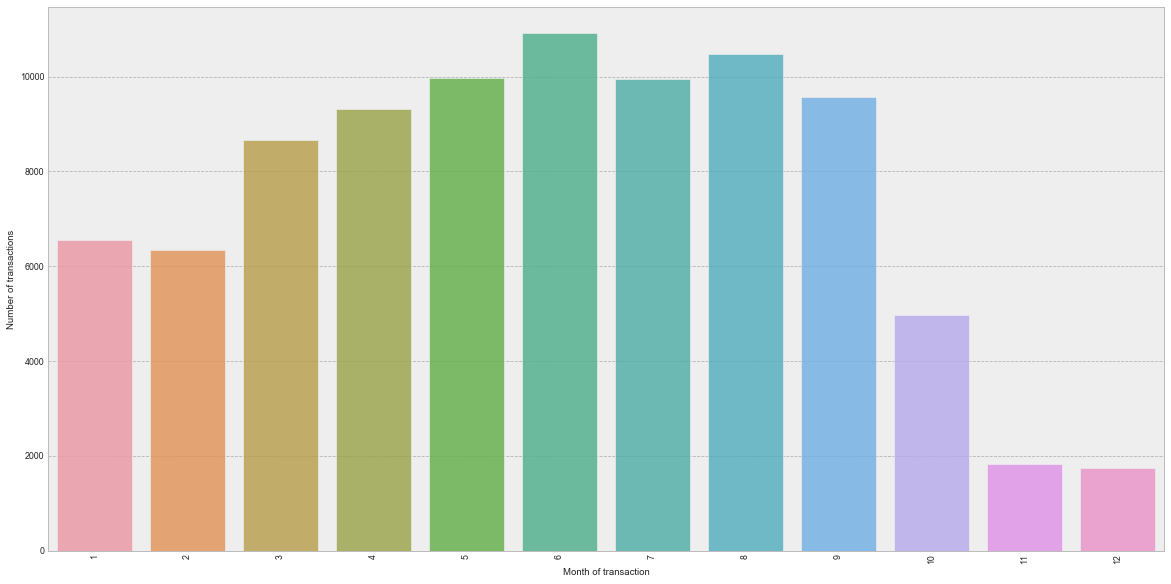

In [34]:
# plot transactions by month
df_clean['transaction_month'] = df_clean['transactiondate'].dt.month
month = df_clean['transaction_month'].value_counts()
plt.figure(figsize=(20, 10))
sns.barplot(month.index, month.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction')
plt.ylabel('Number of transactions')
plt.show()

# Findings:

Our plot shows that the summer season (June, July, August) are likely to be mo active for the real estate agencys, and the winter time (November, December) are less active. Probably people are getting ready for the Festive period, also usually families are less likely to change house durin school time. 

# Question 3: Where are the underestimated/overestimated houses located?  

The logerror shows the difference between the estimated price and the actual sold price.  
So where are the areas which are more likely to be overestimated (sold for less) and underestimated (sold for more)?  
We are interested in the first and last Quantiles.  
Can we see that pattern? 

In [35]:
# make new column for logerrors
# 1 if under 25%
# 2 if 50%
# 3 if more than 75%

df_clean['logerror_bin'] = df_clean.logerror.map(lambda x: 1 if x <= -0.25300
                            else (3 if x  <= 0.039200
                                  else 2))
df_clean.head(5)

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month,logerror_bin
0,11016594,0.0276,2016-01-01,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,2.0,34.280990,-118.488536,7528.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,1,3
1,14366692,-0.1684,2016-01-01,3.5,4.0,NaN,3.5,2263.0,2263.0,6059.0,3.0,NaN,33.668120,-117.677556,3643.0,1,261.0,NaN,6.059052e+07,32380.0,1286.0,96962.0,0.0,NaN,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,1,3
2,12098116,-0.0040,2016-01-01,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,2.0,34.136312,-118.175032,11423.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,1,3
3,12643413,0.0218,2016-01-02,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,2.0,33.755800,-118.309000,70859.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,1,3
4,14432541,-0.0050,2016-01-02,2.5,4.0,NaN,2.5,2283.0,2283.0,6059.0,2.0,NaN,33.485643,-117.700234,6000.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,96961.0,8.0,NaN,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,1,3


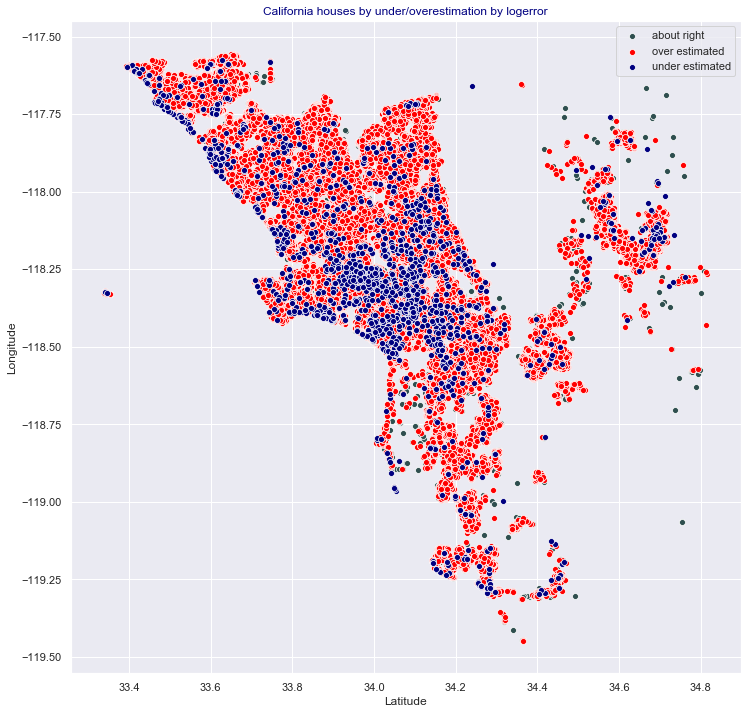

In [36]:
# create map of every house by year of built
sns.set_palette(sns.color_palette("cubehelix"))
sns.set_context('paper')
sns.set(style='darkgrid')

# 'under 25%'
lat1 = df_clean.loc[df_clean['logerror_bin'] == 1].latitude
long1 = df_clean.loc[df_clean['logerror_bin'] == 1].longitude
# 'over 25%'
lat3 = df_clean.loc[df_clean['logerror_bin'] == 3].latitude
long3 = df_clean.loc[df_clean['logerror_bin'] == 3].longitude
# 'else'
lat2 = df_clean.loc[df_clean['logerror_bin'] == 2].latitude
long2 = df_clean.loc[df_clean['logerror_bin'] == 2].longitude

plt.figure(figsize=(12,12))
sns.scatterplot(lat2.values, long2.values, label = 'about right', color='darkslategray')
sns.scatterplot(lat3.values, long3.values, label = 'over estimated', color='red')
sns.scatterplot(lat1.values, long1.values, label = 'under estimated', color='navy')

plt.title('California houses by under/overestimation by logerror', color = 'navy')
plt.legend()

plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

# Findings:

The patern of our visualization clearly shows that the beach areas and the Center of the area are more likely to be underestimated, while the areas to inland more likely to not reach the estimated price.

# Question 4: Where are the historic houses located?

In [37]:
unique = df_clean.yearbuilt.unique()
sorted_unique = sorted(unique)
print(min(sorted_unique))

1885.0


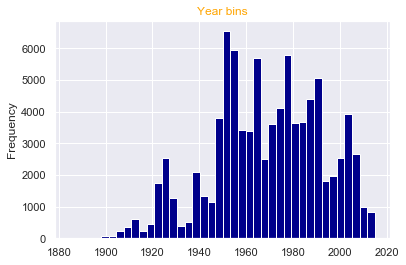

In [38]:
# yearbuilt frequency barplot
df_clean['yearbuilt'].plot.hist(range=(1885, 2015), bins=40, color='darkblue')
plt.title('Year bins', color = 'orange')
plt.show()

In [39]:
# make new column for year_built with 3 bins
# 1 before 1900
# 2 between 1900 and 1940
# 3 between 1940 and 1970
# 4 between 1970 and 2000
# 5 after 2000

df_clean['year_bins'] = df_clean.yearbuilt.map(lambda x: 1 if x >= 1885 and x <= 1900
                            else (2 if x > 1900 and x <= 1940
                                  else (3 if x > 1940 and x <= 1970
                                       else (4 if x > 1970 and x <= 2000
                                            else 5))))
df_clean.head(5)

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month,logerror_bin,year_bins
0,11016594,0.0276,2016-01-01,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,2.0,34.280990,-118.488536,7528.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,1,3,3
1,14366692,-0.1684,2016-01-01,3.5,4.0,NaN,3.5,2263.0,2263.0,6059.0,3.0,NaN,33.668120,-117.677556,3643.0,1,261.0,NaN,6.059052e+07,32380.0,1286.0,96962.0,0.0,NaN,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,1,3,5
2,12098116,-0.0040,2016-01-01,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,2.0,34.136312,-118.175032,11423.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,1,3,2
3,12643413,0.0218,2016-01-02,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,2.0,33.755800,-118.309000,70859.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,1,3,4
4,14432541,-0.0050,2016-01-02,2.5,4.0,NaN,2.5,2283.0,2283.0,6059.0,2.0,NaN,33.485643,-117.700234,6000.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,96961.0,8.0,NaN,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,1,3,4


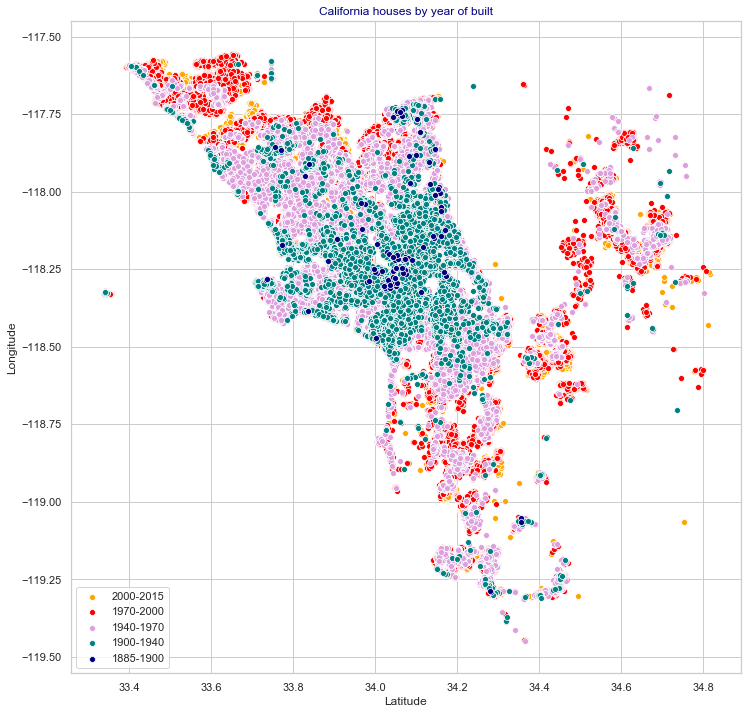

In [40]:
# create map of every house by year of built
sns.set_palette(sns.color_palette("cubehelix"))
sns.set_context('paper')
sns.set(style='whitegrid')

# '2000-2015'
lat5 = df_clean.loc[df_clean['year_bins'] == 5].latitude
long5 = df_clean.loc[df_clean['year_bins'] == 5].longitude
# '1970-2000'
lat4 = df_clean.loc[df_clean['year_bins'] == 4].latitude
long4 = df_clean.loc[df_clean['year_bins'] == 4].longitude
# '1940-1970'
lat3 = df_clean.loc[df_clean['year_bins'] == 3].latitude
long3 = df_clean.loc[df_clean['year_bins'] == 3].longitude
# '1900-1940'
lat2 = df_clean.loc[df_clean['year_bins'] == 2].latitude
long2 = df_clean.loc[df_clean['year_bins'] == 2].longitude
# '1885-1900'
lat1 = df_clean.loc[df_clean['year_bins'] == 1].latitude
long1 = df_clean.loc[df_clean['year_bins'] == 1].longitude

plt.figure(figsize=(12,12))
sns.scatterplot(lat5.values, long5.values, label = '2000-2015', color='orange')
sns.scatterplot(lat4.values, long4.values, label = '1970-2000', color='red')
sns.scatterplot(lat3.values, long3.values, label = '1940-1970', color='plum')
sns.scatterplot(lat2.values, long2.values, label = '1900-1940', color='teal')
sns.scatterplot(lat1.values, long1.values, label = '1885-1900', color='navy')

plt.title('California houses by year of built', color = 'navy')
plt.legend()

plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

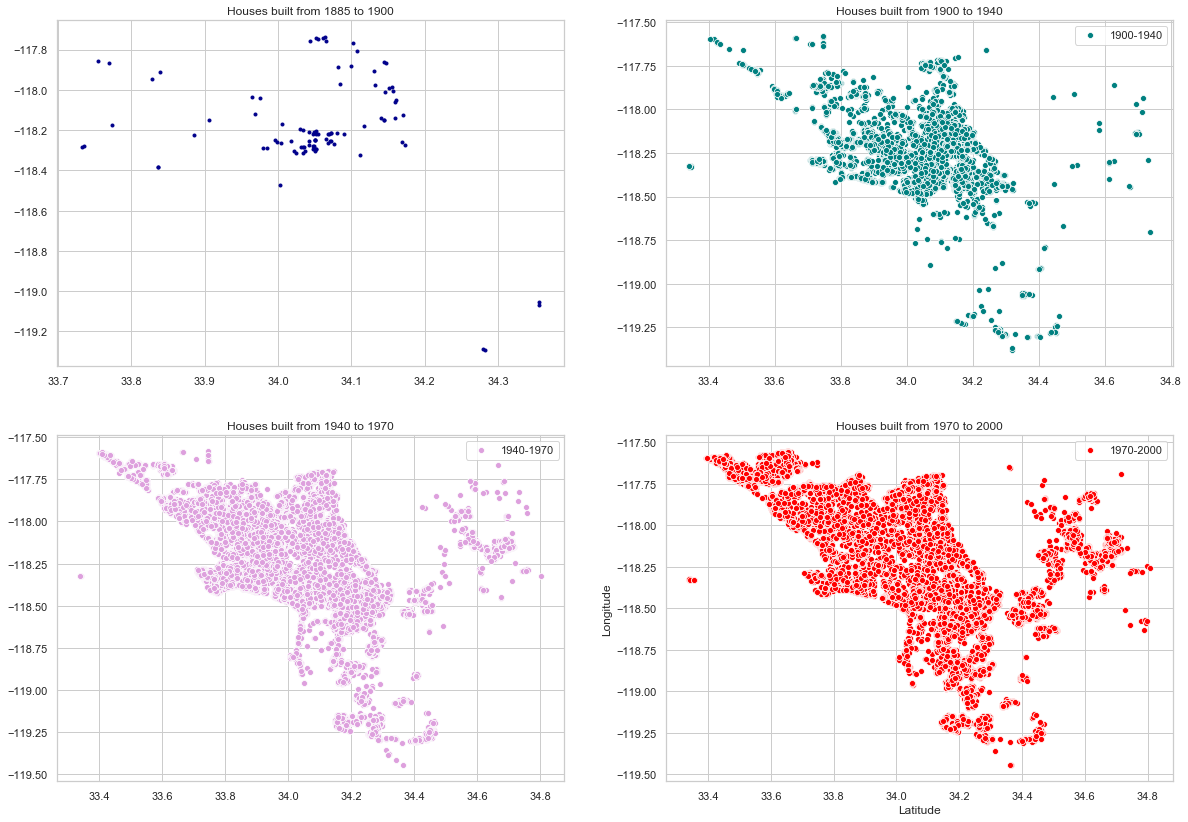

In [41]:
fig = plt.figure(figsize = (20,14))

# ax1 = fig.add_subplot(221)
# sns.scatterplot(lat1.values, long1.values, label = '1885-1900', color='navy')
# plt.legend()

ax1 = fig.add_subplot(221)
plt.scatter(lat1, long1, label = '1885-1900', color='darkblue', marker='.')
plt.title('Houses built from 1885 to 1900')

ax2 = fig.add_subplot(222)
sns.scatterplot(lat2.values, long2.values, label = '1900-1940', color='teal')
plt.title('Houses built from 1900 to 1940')

ax3 = fig.add_subplot(223)
sns.scatterplot(lat3.values, long3.values, label = '1940-1970', color='plum')
plt.title('Houses built from 1940 to 1970')

ax4 = fig.add_subplot(224)
sns.scatterplot(lat4.values, long4.values, label = '1970-2000', color='red')
plt.title('Houses built from 1970 to 2000')

# ax5 = fig.add_subplot(225)
# sns.scatterplot(lat5.values, long5.values, label = '2000-2015', color='orange')
# plt.title('Houses built from 2000 to 2015')

plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

Text(0.5, 1.0, 'Houses built from 2000 to 2015')

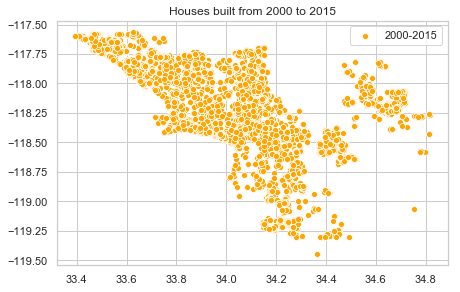

In [42]:
# Houses built from 2000 to 2015
fig = plt.figure(figsize = (7,4.5))

sns.scatterplot(lat5.values, long5.values, label = '2000-2015', color='orange')
plt.title('Houses built from 2000 to 2015')

# Findings: 

The really early houses (built before 1900) are mostly scattered an the Northern part, but houses built before the World War ii (still counted as historical buildings) can be found all over the Central Areas.

# Step 4: Prepare for Linear Regression
Use visulisation to further study the distribution of potential key independent variables as indicated by correlation matrix. Also check for a linear relationship between independent variables and the dependent variable via scatter plots. Are any obvious data outliers in the graphs?

In [46]:
# impute the missing values with mean values to compute correlation coefficients 
# check type (needs to be a df)
mean_values = df_clean.mean(axis=0)
df_clean_new = df_clean
type(df_clean_new)

pandas.core.frame.DataFrame

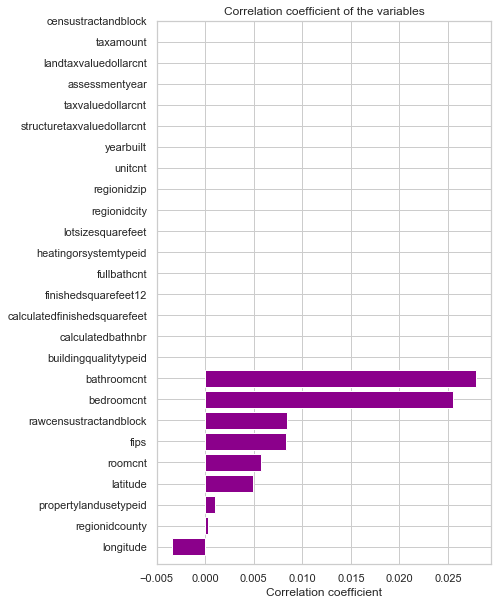

In [48]:
# look at the correlation coefficient of each of these variables
x_cols = [col for col in df_clean_new.columns if col not in ['logerror'] if df_clean_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_clean_new[col].values, df_clean_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')


ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,10))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='darkmagenta')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")

plt.show()


In [ ]:
# create df for continious variables
continuous = ['bathroomcnt','bedroomcnt','finishedsquarefeet12','taxvaluedollarcnt','taxamount', 'logerror']

In [ ]:
# plot the pairwise relationships
sns.pairplot((df_clean[continuous]), palette="husl")
plt.show()

In [ ]:
sns.heatmap(round(df_clean[continuous].corr(), 2), annot=True, cmap='RdYlGn_r')

In [ ]:
# so from 2 pairs I'm dropping 1 pair (need to choose) + for each pair dropping the least correlated one 
# needs to be over 0.75
# in this case I'm keeping fsqft12

In [ ]:
df_clean.columns

In [ ]:
# use boxplots to look at the spread of distribution and spot any outliers in the potential independent variables

plt.style.use('default')
plt.figure(figsize=(16,14))
# plt.title('To Study the dispersion of potential independent variables')

plt.subplot(2,2,1)
df_clean[['bedroomcnt','taxamount']].boxplot()

plt.subplot(2,2,2)
df_clean[['bedroomcnt','bathroomcnt','finishedsquarefeet12']].boxplot()

plt.subplot(2,2,3)
df_clean[['finishedsquarefeet12','taxvaluedollarcnt']].boxplot()

plt.subplot(2,2,4)
df_clean[['finishedsquarefeet12','bedroomcnt']].boxplot()

plt.show()

In [ ]:

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in df_clean_new.columns if col not in ['logerror'] if df_clean_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_clean_new[col].values, df_clean_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,10))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='darkmagenta')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [ ]:
# see the correlation in numbers
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.03) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

In [ ]:
cols_to_use = corr_df_sel.col_labels.tolist()

df_temp = df_clean_new[cols_to_use]
corrmat = df_temp.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, annot=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [ ]:
# Finished living area varies with the logerror
col = "finishedsquarefeet12"
ulimit = np.percentile(df_clean[col].values, 99)
llimit = np.percentile(df_clean[col].values, 1)
df_clean[col].loc[df_clean[col]>ulimit] = ulimit
df_clean[col].loc[df_clean[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=df_clean.finishedsquarefeet12.values, y=df_train.logerror.values, size=10, color='darkslateblue')
plt.ylabel('Log Error')
plt.xlabel('Finished Square Feet 12')
plt.title('Finished square feet 12 Vs Log error')
plt.show()

In [ ]:
# Finished living area varies with the taxamount
col = "finishedsquarefeet12"
ulimit = np.percentile(df_clean[col].values, 99.5)
llimit = np.percentile(df_clean[col].values, 0.5)
df_clean[col].loc[df_clean[col]>ulimit] = ulimit
df_clean[col].loc[df_clean[col]<llimit] = llimit

plt.figure(figsize=(10,10))
sns.jointplot(x=df_clean.finishedsquarefeet12.values, y=df_clean.taxamount.values, size=10, color='darkslateblue')
plt.ylabel('Log Error')
plt.xlabel('Finished Square Feet 12')
plt.title('Finished square feet 12 Vs Tax amount')
plt.show()

In [ ]:
# bathrooms
plt.figure(figsize=(12,8))
sns.countplot(x='bathroomcnt', data=df_clean)
plt.ylabel('Count')
plt.xlabel('Bathroom')
plt.xticks(rotation='vertical')
plt.title('Frequency of Bathroom count')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathroomcnt', y='logerror', data=df_clean)
plt.ylabel('Log error')
plt.xlabel('Bathroom Count')
plt.xticks(rotation='vertical')
plt.title('How log error changes with bathroom count?')
plt.show()


In [ ]:
df_temp.columns

In [ ]:
unique_logerror = df_clean.logerror.unique()
sorted_unique_logerror = sorted(unique_logerror)
print(min(sorted_unique_logerror))
print(max(sorted_unique_logerror))

In [ ]:
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')

ulimit = np.percentile(df_clean.logerror.values, 99)
llimit = np.percentile(df_clean.logerror.values, 1)
df_clean['logerror'].loc[df_clean['logerror']>ulimit] = ulimit
df_clean['logerror'].loc[df_clean['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(df_clean.logerror.values, bins=200, color='cyan', kde=False)
plt.xlabel('logerror')
plt.show()

In [ ]:
# plot logerror
plt.figure(figsize=(8,5))
sns.distplot(df_clean.logerror.values, bins=100, color='magenta', kde=False)
plt.xlabel('logerror')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')

ulimit = np.percentile(df_clean.taxamount.values, 99)
llimit = np.percentile(df_clean.taxamount.values, 1)
df_clean['taxamount'].loc[df_clean['taxamount']>ulimit] = ulimit
df_clean['taxamount'].loc[df_clean['taxamount']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(df_clean.taxamount.values, bins=50, color='cyan', kde=False)
plt.xlabel('taxamount')
plt.show()

In [ ]:

def plot_avgs_scatter(dataframe, group, variable ):
    grouped_means = dataframe.groupby(group).mean().reset_index()
    grouped_means.plot.scatter(group, variable)

def plot_med_scatter(dataframe, group, y_variable):
    grouped_means = dataframe.groupby(group).median().reset_index()
    grouped_means.plot.scatter(group, y_variable)

In [ ]:
plot_med_scatter(df_clean, 'bedroomcnt', 'taxamount')
plt.ylim(0,3_000_000)
plt.show()

plt.bar(df_clean.bedroomcnt.value_counts().index, df_clean.bedroomcnt.value_counts().values)
plt.xlabel('no. of bedroomcnt')
plt.ylabel('counts')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
f = 'logerror~finishedsquarefeet12'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
f = 'taxamount~finishedsquarefeet12'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
f = 'logerror~bathroomcnt'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
f = 'logerror~bedroomcnt'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
f = 'logerror~calculatedfinishedsquarefeet'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
f = 'logerror~landtaxvaluedollarcnt'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
f = 'logerror~taxamount'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
f = 'logerror~latitude'
uni_model_sqftliv = ols(formula=f, data=df_clean).fit()
uni_model_sqftliv.summary()

In [ ]:
sns.lmplot( x='finishedsquarefeet12', y ='logerror', data = df_clean, markers='.')

In [ ]:
sns.lmplot( x='finishedsquarefeet12', y ='taxamount', data = df_clean, markers='.')

In [ ]:
outcome = 'logerror'
x_cols = ['finishedsquarefeet12','bedroomcnt', 'latitude']
predictors = '+'.join(x_cols)

display(df_clean[x_cols].corr())

formula = outcome + '~' + predictors
multi_model = ols(formula=formula, data=df_clean).fit()
multi_model.summary()

# best fit model gives R2 of 0.61
# no colliniearity issue as the x variables have very low correlation

In [ ]:
# QQ plot suggest residuals from the higher quantile (higher house sold prices) are far away from Normal
df_clean['finishedsquarefeet12'] = df_clean['finishedsquarefeet12'].map(lambda x: np.log(x))
df_clean['taxamount'] = df_clean['logerror'].map(lambda x: np.log(x))

In [ ]:
plt.figure(figsize=(16,14))
plt.title('The distribution of finishedsquarefeet12 and ln(finishedsquarefeet12')

x_cols = ['sqft_living','sqft_liv_log','price','price_log']

for x in x_cols:
    i = x_cols.index(x) + 1
    plt.subplot(2,2,i)
    clean_df[x].hist(bins=50)
    

In [ ]:
df_clean.columns

In [ ]:
df_type = df_clean.dtypes.reset_index()
df_type.columns=['Count', 'Column Type']
df_type.head()

In [ ]:
df_type.groupby('Column Type').aggregate('count').reset_index()

In [ ]:
df_float.info()

In [ ]:

sns.set_palette(sns.color_palette("cubehelix", 8))
sns.set_context('paper')

plt.figure(figsize=(12,12))
sns.jointplot(df_clean.latitude.values, df_clean.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(12,12))
sns.set_context('paper')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(df_clean.latitude.values, df_clean.longitude.values, cmap=cmap, shade=True);

# pal = sns.dark_palette("palegreen", as_cmap=True)
# sns.kdeplot(x, y, cmap=pal);

In [ ]:
# create map of every house
sns.set_palette(sns.color_palette("cubehelix"))
sns.set_context('paper')

plt.figure(figsize=(12,12))
sns.scatterplot(df_clean.latitude.values, df_clean.longitude.values)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
# visualizing latitude and longitude with logerror
plt.figure(figsize=(12,12))
sns.set_context('paper')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

z = df_clean.logerror
plt.scatter(df_clean.latitude.values, df_clean.longitude.values, s=z*2000, c=df_clean.latitude.values, cmap=cmap, alpha=0.4, linewidth=2)
# plt.scatter(x, y, s=z*2000, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

plt.show()

bedroomcnt, calculatedfinishedsquarefeet, fullbathcnt, lotsizesquarefeet, roomcnt, taxamount, yearbuilt

In [ ]:
houses_by_year = df.groupby('yearbuilt')

In [ ]:
houses_by_year

In [ ]:
# houses by year 
houses_by_year.median().reset_index().plot.scatter('yearbuilt','logerror')
plt.show()

In [ ]:
df_clean.columns

In [ ]:
# we want to check the unique values and counts of a few data series

for col in (['yearbuilt', 'taxamount', 'taxvaluedollarcnt', 'regionidzip', 'fullbathcnt', 'bedroomcnt']):
    display(df_clean.groupby(col).size())
    
display(df_clean['calculatedfinishedsquarefeet'].value_counts().head())

df_clean['lotsizesquarefeet'].value_counts().head()

In [ ]:

df_clean.corr()

In [ ]:
df_clean[['taxamount', 'taxvaluedollarcnt', 'yearbuilt', 'finishedsquarefeet12', 'regionidzip', 'unitcnt']].corr()

In [ ]:
df_clean[['bathroomcnt', 'bedroomcnt', 'yearbuilt', 'logerror', 'finishedsquarefeet12']].corr()

In [ ]:
df_clean.unitcnt.value_counts()

In [ ]:
df_clean.loc[(df_clean['unitcnt'] == 143)]